# Prediction on Animal Species

## Summary
The dataset we will be using is the Zoo (1990) provided by UC Irvine Machine Learning Repository. It stores data about 7 class animals and related attributes inlcuding animal name, hair, feathers, etc. are contained. In this project, we will use classification to classify a given animal to the most likely type.
## Introduction
bg: 
qs: How can classification be used in predicting animal species?
description of the dateset: The zoo dataset contains 1 categorical attribute, 17 Boolean-valued attributes and 1 numerical attribute. The categorical attribute appears to be the class attribute. Detailed breakdowns are as follows: 
1. animal name: Unique for each instance 
2. hair: Boolean 
3. feathers: Boolean 
4. eggs: Boolean 
5. milk: Boolean 
6. airborne: Boolean 
7. aquatic: Boolean 
8. predator: Boolean 
9. toothed: Boolean 
10. backbone: Boolean 
11. breathes: Boolean 
12. venomous: Boolean 
13. fins: Boolean 
14. legs: Numeric (set of values: {0,2,4,5,6,8}) 
15. tail: Boolean 
16. domestic: Boolean 
17. catsize: Boolean 
18. type: Numeric (integer values in range [1,7])

## Methods & Results


In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
#reading the data as a csv from the uci web server, with header = false as the data contains no header
# zoo_data = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/zoo/zoo.data", header = None)
#Adding column names to the data
# colm = [ "animalName", "hair", "feathers", "eggs", "milk", "airborne", "aquatic", "predator", "toothed", "backbone", "breathes", "venomous", "fins", "legs", "tail", "domestic", "catsize", "type" ]
# #Adding the columns to our zoo_data dataframe
# zoo_data.columns = colm

In [3]:
zoo_data = pd.read_csv("./data/zoo.csv")
zoo_data.head()

,Unnamed: 0,animalName,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
0,0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


The first thing is to import the data. The dataset is downloaded from [UCI repository]("https://archive-beta.ics.uci.edu/ml/datasets/zoo"). It is then saved as a csv file in this project repository. Some exploratory data analysis needs to be run before running the actual analyses on the dataset.

In [29]:
#saving the data as a csv file in our data directory
# zoo_data.to_csv(r'./data/zoo.csv')

In [30]:
# Check if there are missing values
print("Whether the dataset contains missing value: " + str(zoo_data.isna().any().any()))

Whether the dataset contains missing value: False


In [31]:
# drop the first column
zoo_data = zoo_data.drop(zoo_data.columns[[0,1]], axis=1)

In [32]:
# Create a summary of the data set, including descriptive statistics
zoo_data.describe()

,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


After checking whether there is missing value in the dataset, and generating a summary of the dataset, it is clear that the data is clean. Since most features are binary and categorical, there is no need to do normalization and standardization.

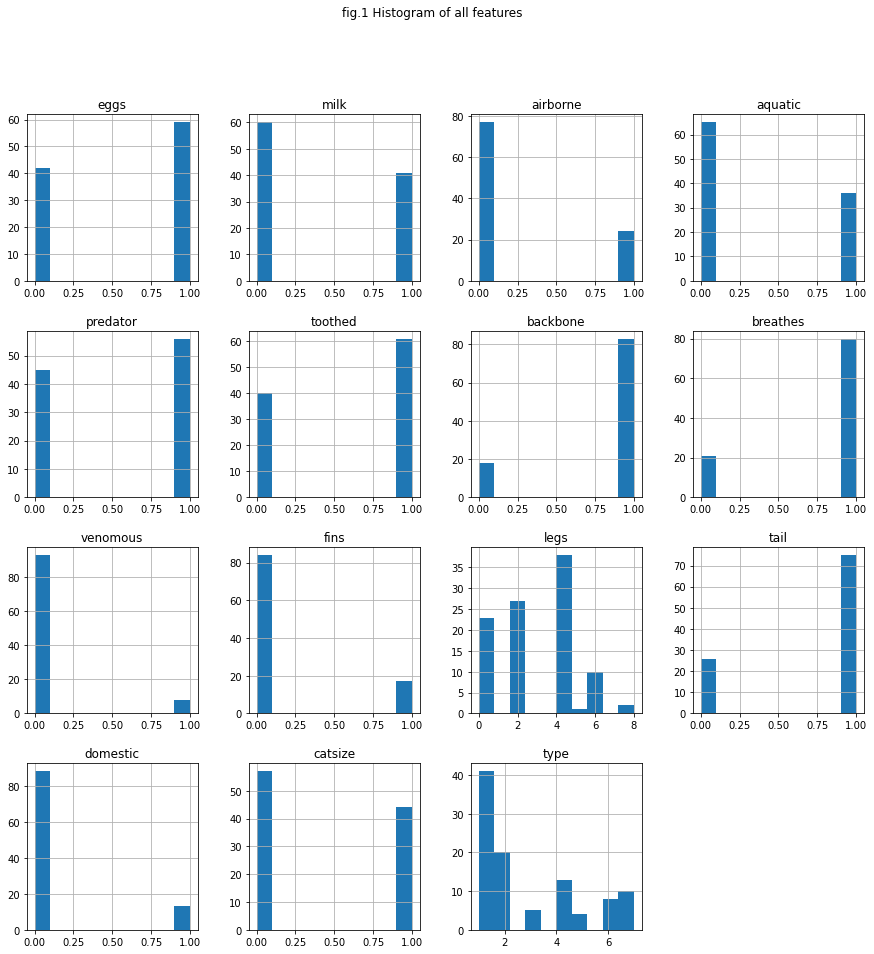

In [33]:
# Create a visualization of the dataset
zoo_data.hist(figsize=(15,15));
plt.suptitle("fig.1 Histogram of all features");

As shown in fig.1, the histograms of each feature are generated. The ones with skewed distribution might be more decisive in the prediction. However, since the dataset is relatively small, all the features except the `animalName` are going to be used to predict. In the next part, we are going to split the data, into the training set and testing set. Then, different classification models will be trained for future evaluation.

In [9]:
# Split train and test set
zoo_train, zoo_test = train_test_split(zoo_data, test_size=0.2, random_state=123)
zoo_train_X, zoo_train_y = zoo_train.drop(columns=["type"]), zoo_train["type"]
zoo_test_X, zoo_test_y = zoo_test.drop(columns=["type"]), zoo_test["type"]

In [10]:
# Creating models
knn = KNeighborsClassifier()
dt = DecisionTreeClassifier()

Before actually fitting the models, we are going to optimize the hyperparameters for each model. The `GridSearchCV` can automatically search and evaluating the values of each hyperparamter, then choose the best one to fit the model.

In [11]:
# Finding K value for KNN
k_vals = list(range(1, 21))
param_grid = dict(n_neighbors=k_vals)
grid = GridSearchCV(knn, param_grid, cv=4, scoring='accuracy')
grid.fit(zoo_train_X, zoo_train_y)
grid.best_params_

{'n_neighbors': 1}

In [24]:
# Finding max depth for Decision Tree
depths = list(range(1, 80))
param_grid = dict(max_depth=depths)
grid = GridSearchCV(dt, param_grid, cv=4, scoring='accuracy')
grid.fit(zoo_train_X, zoo_train_y)
grid.best_params_

{'max_depth': 8}

In [25]:
# Training models
knn = KNeighborsClassifier(n_neighbors=1)
dt = DecisionTreeClassifier(max_depth=8)
knn.fit(zoo_train_X, zoo_train_y);
dt.fit(zoo_train_X, zoo_train_y);

In [26]:
# cross-validation on knn
cv_results_knn = cross_validate(knn, zoo_train_X, zoo_train_y, cv=4, return_train_score=True);
pd.DataFrame(cv_results_knn).mean()

fit_time       0.001717
score_time     0.002248
test_score     0.975000
train_score    1.000000
dtype: float64

In [27]:
# cross-validation on decision tree
cv_results_dt = cross_validate(dt, zoo_train_X, zoo_train_y, cv=4, return_train_score=True);
pd.DataFrame(cv_results_dt).mean()

fit_time       0.002095
score_time     0.001410
test_score     0.950000
train_score    1.000000
dtype: float64

In [28]:
print("Test accuracy of KNN: " + str(knn.score(zoo_test_X, zoo_test_y)))
print("Test accuracy of Decision Tree: " + str(dt.score(zoo_test_X, zoo_test_y)))

Test accuracy of KNN: 1.0
Test accuracy of Decision Tree: 0.9047619047619048
